<a href="https://colab.research.google.com/github/arinjay-singh/econ3916-statistical-machine-learning/blob/main/Class%203/class3_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wbgapi

In [31]:
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Extraction

In [47]:
# Define Economies: MEX (Mexico), UMC (Upper Middle Income), WLD (World)
country_codes = ['MEX', 'UMC', 'WLD']

indicators = {
    'NY.GDP.PCAP.KD': 'GDP_Per_Capita_Const',     # Standard of Living
    'SL.TLF.CACT.ZS': 'Labor_Part_Rate',          # Labor Supply
    'SL.UEM.TOTL.ZS': 'Unemployment_Rate',        # Labor Friction
    'SL.TLF.TOTL.IN': 'Labor_Force_Total',        # Total Workers
    'NY.GDP.MKTP.KD': 'GDP_Const',                # Economic Size
    'FP.CPI.TOTL.ZG': 'Inflation_CPI',            # Stability
    'NY.GDS.TOTL.ZS': 'Gross_Dom_Savings',        # Savings
    'NE.GDI.TOTL.ZS': 'Gross_Cap_Formation',      # Investment
    'NE.EXP.GNFS.ZS': 'Exports_GDP',              # Exports
    'NE.IMP.GNFS.ZS': 'Imports_GDP',              # Imports
    'GC.TAX.TOTL.GD.ZS': 'Tax_Rev_GDP',           # Gov Revenue
    'NE.CON.GOVT.ZS': 'Gov_Exp_GDP'               # Gov Spending
}

In [48]:
# fetch data
print("Fetching data...")
df_raw = wb.data.DataFrame(indicators, economy=country_codes, time=range(2000, 2025))

# transpose dataset
df = df_raw.T

# clean index and sort by year
df.index = df.index.str.replace('YR', '').astype(int)
df.index.name = 'Year'
df = df.sort_index()

# rename columns with indicators dict
df.rename(columns=indicators, level=1, inplace=True)

# extract mexico data
df_mex = df.xs('MEX', axis=1, level=0).copy()

print("Data fetched successfully.")

Fetching data...
Data fetched successfully.


In [49]:
# Natural Rate of Unemployment (5-Year MA)
df_mex['Natural_Rate_Unemp'] = df_mex['Unemployment_Rate'].rolling(window=5).mean()

# Productivity (Output per Worker)
df_mex['Productivity'] = df_mex['GDP_Const'] / df_mex['Labor_Force_Total']

# Net Capital Outflow (Exports - Imports)
df_mex['NCO'] = df_mex['Exports_GDP'] - df_mex['Imports_GDP']

# Budget Balance (Tax - Spending)
df_mex['Budget_Balance'] = df_mex['Tax_Rev_GDP'] - df_mex['Gov_Exp_GDP']

# Visualizations

In [74]:
plt.style.use('default')

## Only Mexico

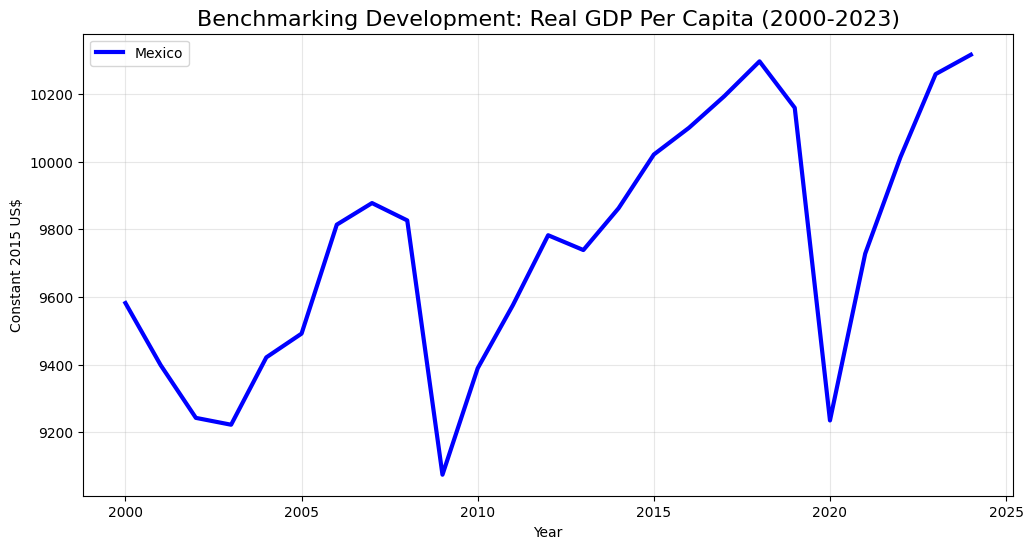

In [63]:
plt.figure(figsize=(12, 6))
# Plot ONLY Mexico
plt.plot(df.index, df[('MEX', 'GDP_Per_Capita_Const')], label='Mexico', color='blue', linewidth=3)
plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.ylabel('Constant 2015 US$')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Mexico Relative to Upper Middle Income and World Averages

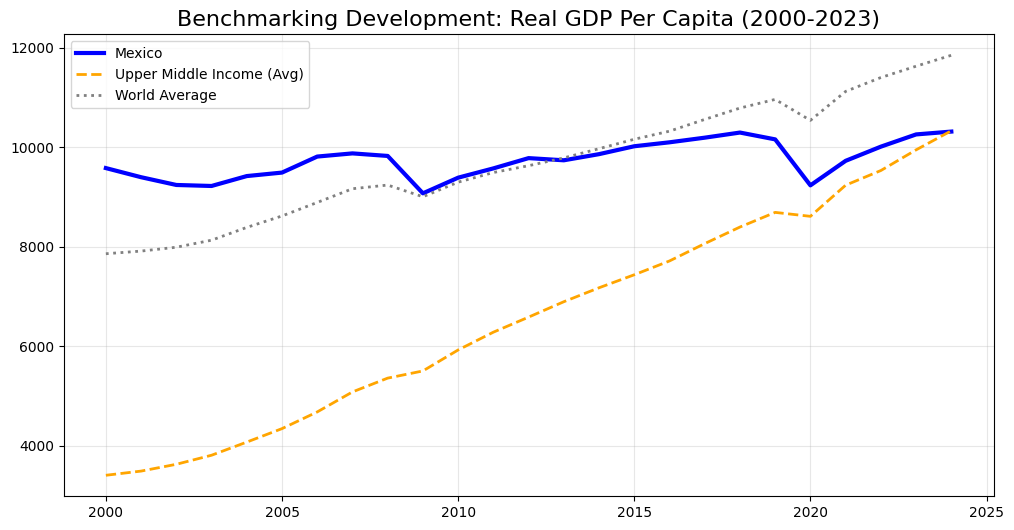

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[('MEX', 'GDP_Per_Capita_Const')], label='Mexico', color='blue', linewidth=3)
# Upper Middle Income (UMC) and World (WLD) averages
plt.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], label='Upper Middle Income (Avg)', color='orange', linestyle='--', linewidth=2)
plt.plot(df.index, df[('WLD', 'GDP_Per_Capita_Const')], label='World Average', color='grey', linestyle=':', linewidth=2)

plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Wealth and Growth

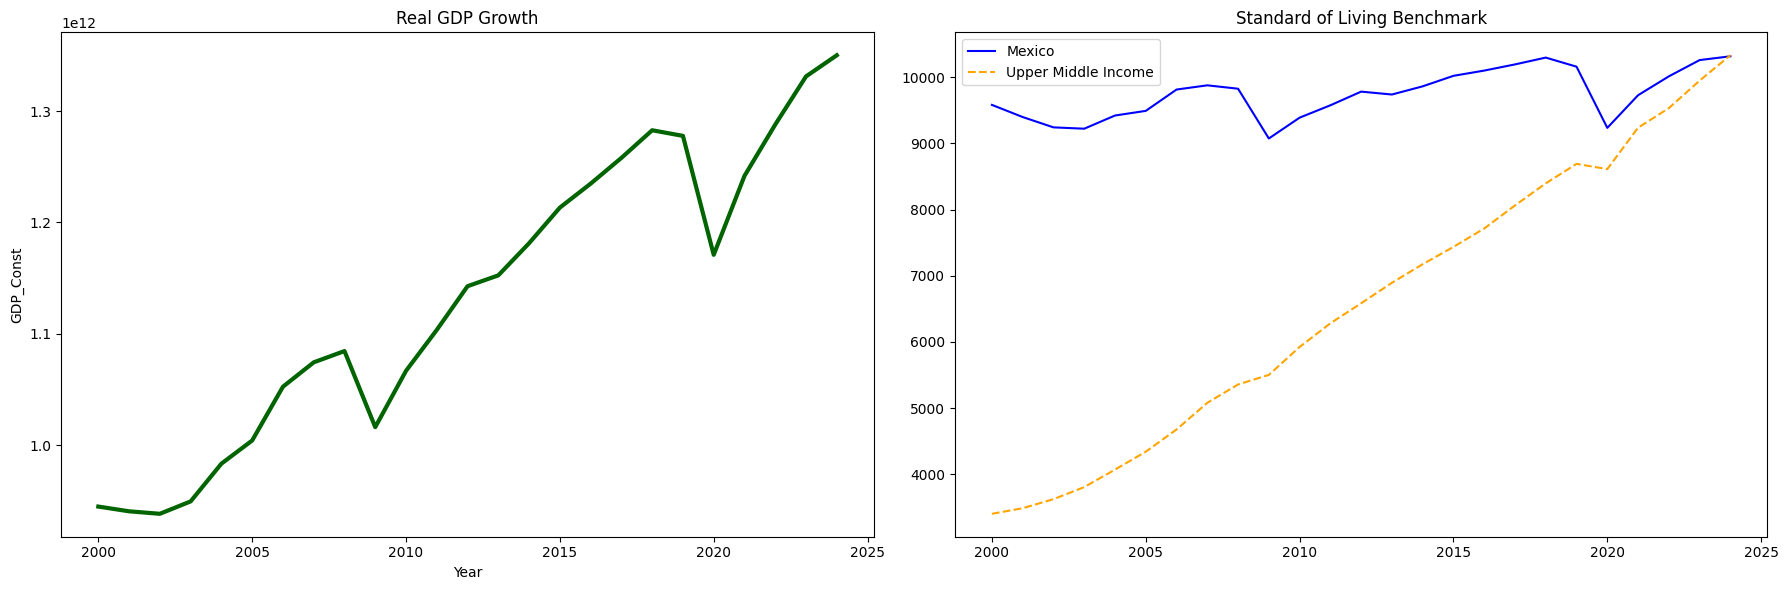

In [75]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Chart A: Total GDP
sns.lineplot(data=df_mex, x=df_mex.index, y='GDP_Const', color='darkgreen', linewidth=3, ax=ax1)
ax1.set_title('Real GDP Growth')

# Chart B: GDP Per Capita Benchmark
ax2.plot(df.index, df[('MEX', 'GDP_Per_Capita_Const')], color='blue')
ax2.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], color='orange', linestyle='--')
ax2.set_title('Standard of Living Benchmark')
ax2.legend(['Mexico', 'Upper Middle Income'])
plt.tight_layout()
plt.show()

## Labor Market

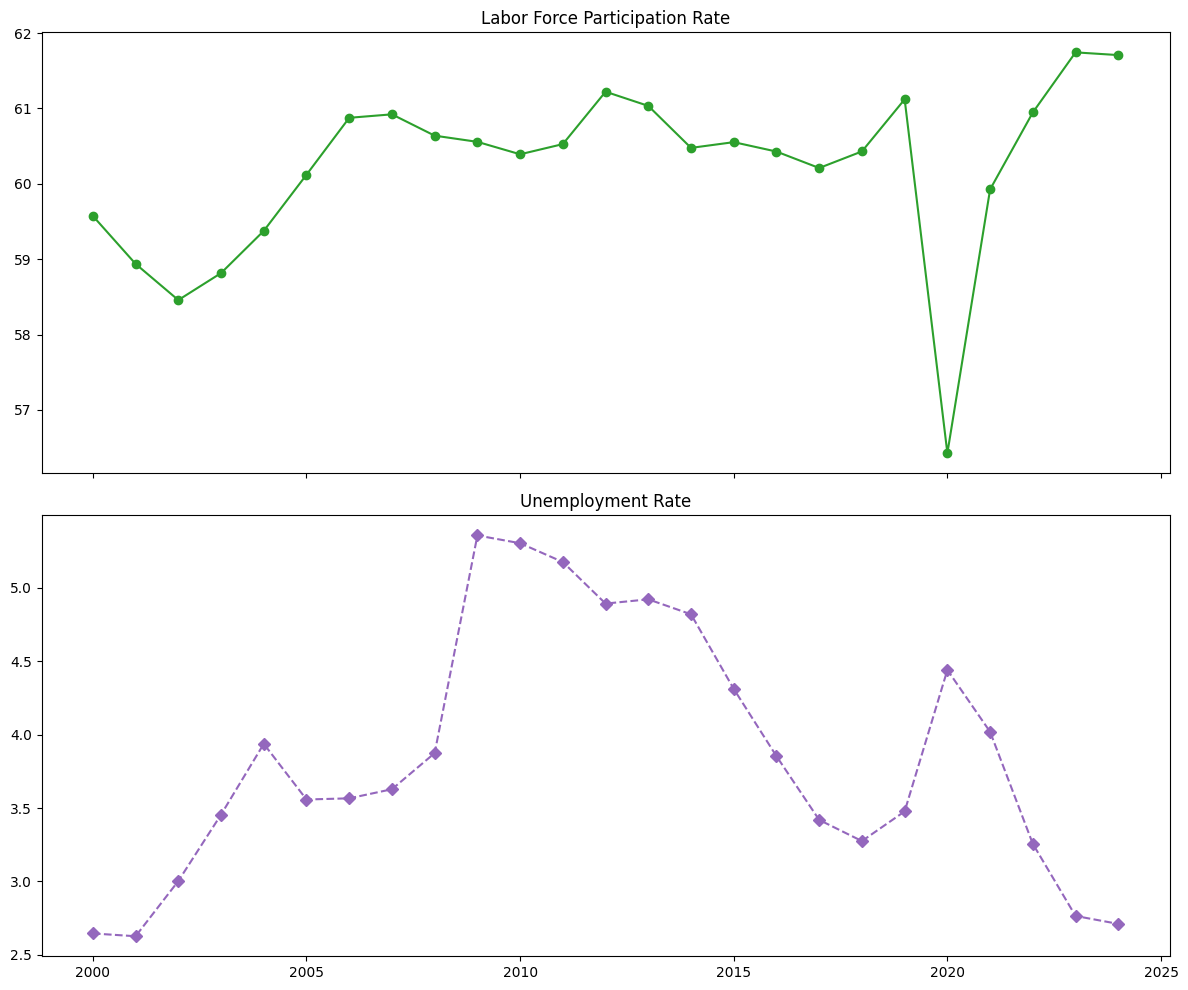

In [66]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Top: Participation
ax1.plot(df_mex.index, df_mex['Labor_Part_Rate'], color='tab:green', marker='o')
ax1.set_title('Labor Force Participation Rate')

# Bottom: Unemployment
ax2.plot(df_mex.index, df_mex['Unemployment_Rate'], color='tab:purple', marker='D', linestyle='--')
ax2.set_title('Unemployment Rate')
plt.tight_layout()
plt.show()

## Inflation

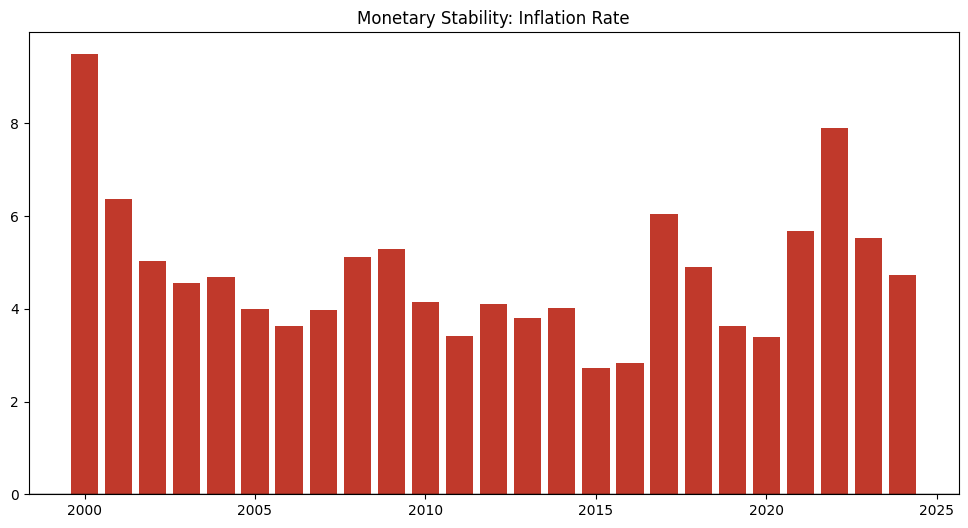

In [67]:
plt.figure(figsize=(12, 6))

plt.bar(df_mex.index, df_mex['Inflation_CPI'], color='#c0392b')

plt.axhline(0, color='black', linewidth=1)
plt.title('Monetary Stability: Inflation Rate')
plt.show()

## Savings and Investment

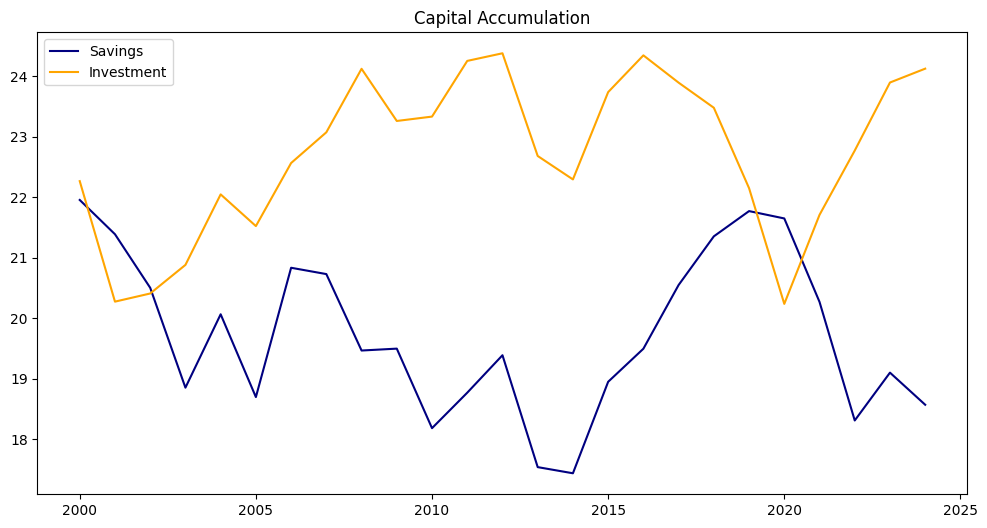

In [68]:
plt.figure(figsize=(12, 6))
plt.plot(df_mex.index, df_mex['Gross_Dom_Savings'], label='Savings', color='navy')
plt.plot(df_mex.index, df_mex['Gross_Cap_Formation'], label='Investment', color='orange')
plt.title('Capital Accumulation')
plt.legend()
plt.show()

## Trade Balance and NCO

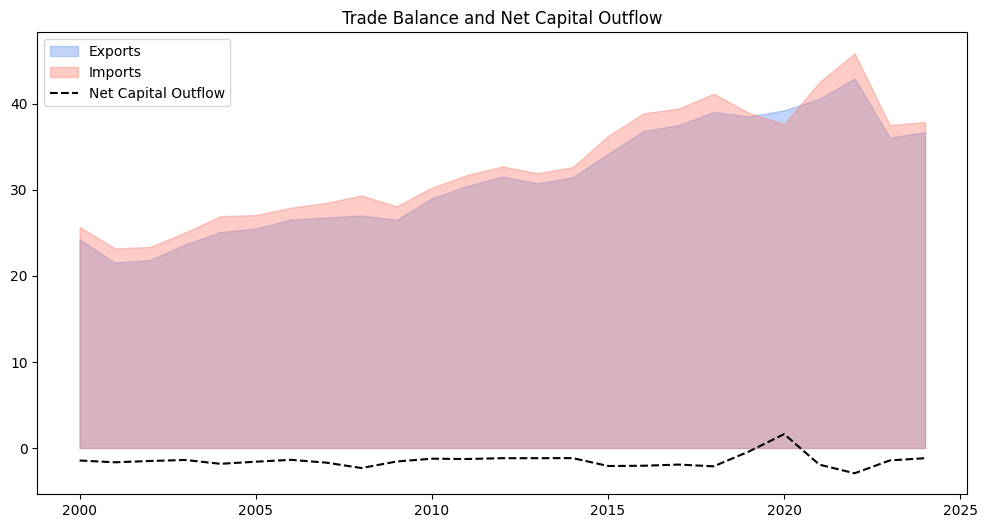

In [76]:
plt.figure(figsize=(12, 6))
plt.fill_between(df_mex.index, df_mex['Exports_GDP'], color='cornflowerblue', alpha=0.4, label='Exports')
plt.fill_between(df_mex.index, df_mex['Imports_GDP'], color='salmon', alpha=0.4, label='Imports')
plt.plot(df_mex.index, df_mex['NCO'], color='black', linestyle='--', label='Net Capital Outflow')
plt.title('Trade Balance and Net Capital Outflow')
plt.legend()
plt.show()

## Fiscal Policy

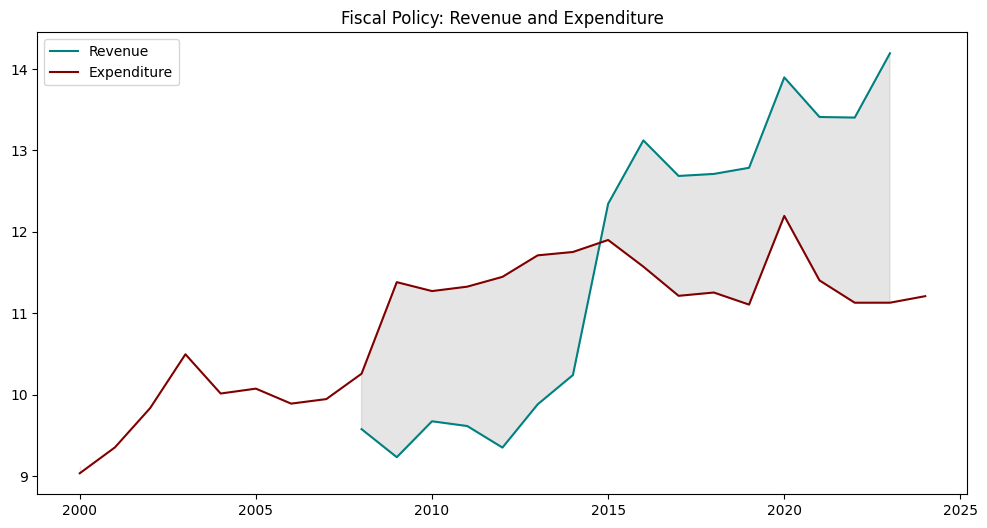

In [70]:
plt.figure(figsize=(12, 6))
plt.plot(df_mex.index, df_mex['Tax_Rev_GDP'], label='Revenue', color='teal')
plt.plot(df_mex.index, df_mex['Gov_Exp_GDP'], label='Expenditure', color='maroon')
plt.fill_between(df_mex.index, df_mex['Tax_Rev_GDP'], df_mex['Gov_Exp_GDP'], color='gray', alpha=0.2)
plt.title('Fiscal Policy: Revenue and Expenditure')
plt.legend()
plt.show()

# Manipulating Data

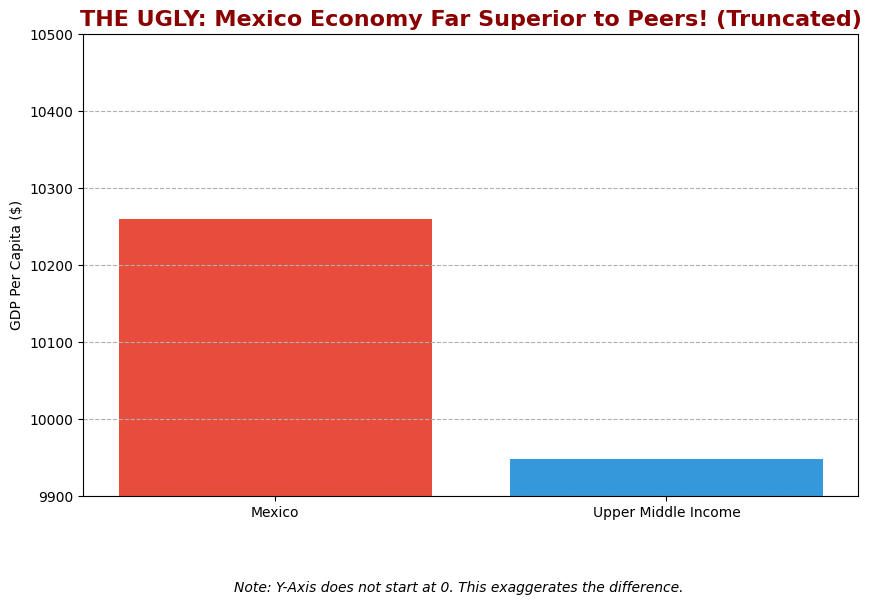

In [71]:
# THE UGLY CHART
# Setup snapshot data for the latest available year
snapshot_year = 2023
mex_val = df.loc[snapshot_year, ('MEX', 'GDP_Per_Capita_Const')]
umc_val = df.loc[snapshot_year, ('UMC', 'GDP_Per_Capita_Const')]

values = [mex_val, umc_val]
labels = ['Mexico', 'Upper Middle Income']

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['#e74c3c', '#3498db'])

# THE VIOLATION: Truncating the axis
# Mexico appears much better than upper middle income
plt.ylim(9900, 10500)

plt.title('THE UGLY: Mexico Economy Far Superior to Peers! (Truncated)', fontsize=16, fontweight='bold', color='darkred')
plt.ylabel('GDP Per Capita ($)')
plt.grid(axis='y', linestyle='--')
plt.figtext(0.5, -0.05, "Note: Y-Axis does not start at 0. This exaggerates the difference.", ha="center", style='italic')

plt.show()

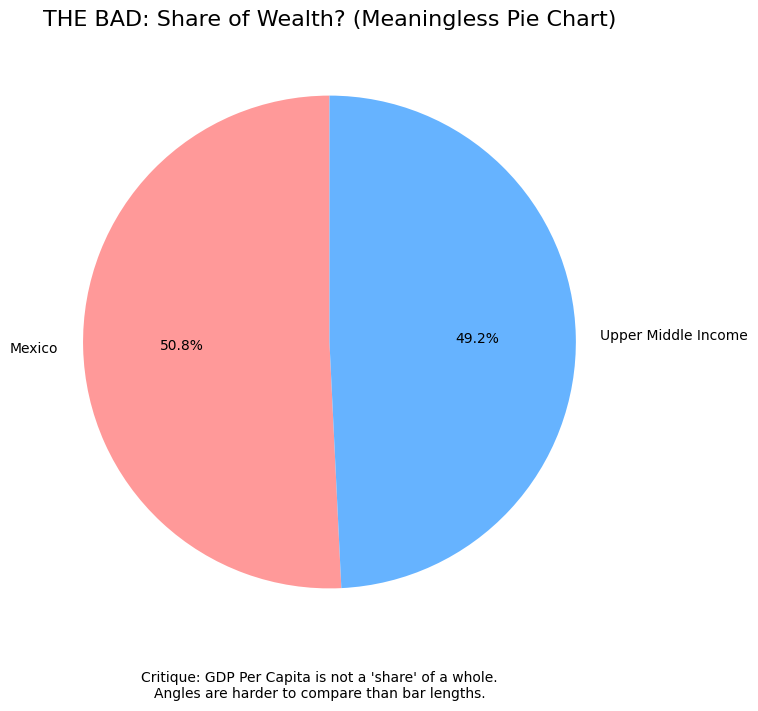

In [72]:
# CELL 9: THE BAD CHART
plt.figure(figsize=(8, 8))

# THE VIOLATION: Using a Pie Chart for non-summable data (GDP Per Capita)
# Comparison of magnitudes should be a Bar Chart, not angles.
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)

plt.title('THE BAD: Share of Wealth? (Meaningless Pie Chart)', fontsize=16)
plt.figtext(0.5, 0.05, "Critique: GDP Per Capita is not a 'share' of a whole.\nAngles are harder to compare than bar lengths.", ha="center")

plt.show()

# Executive Dashboard

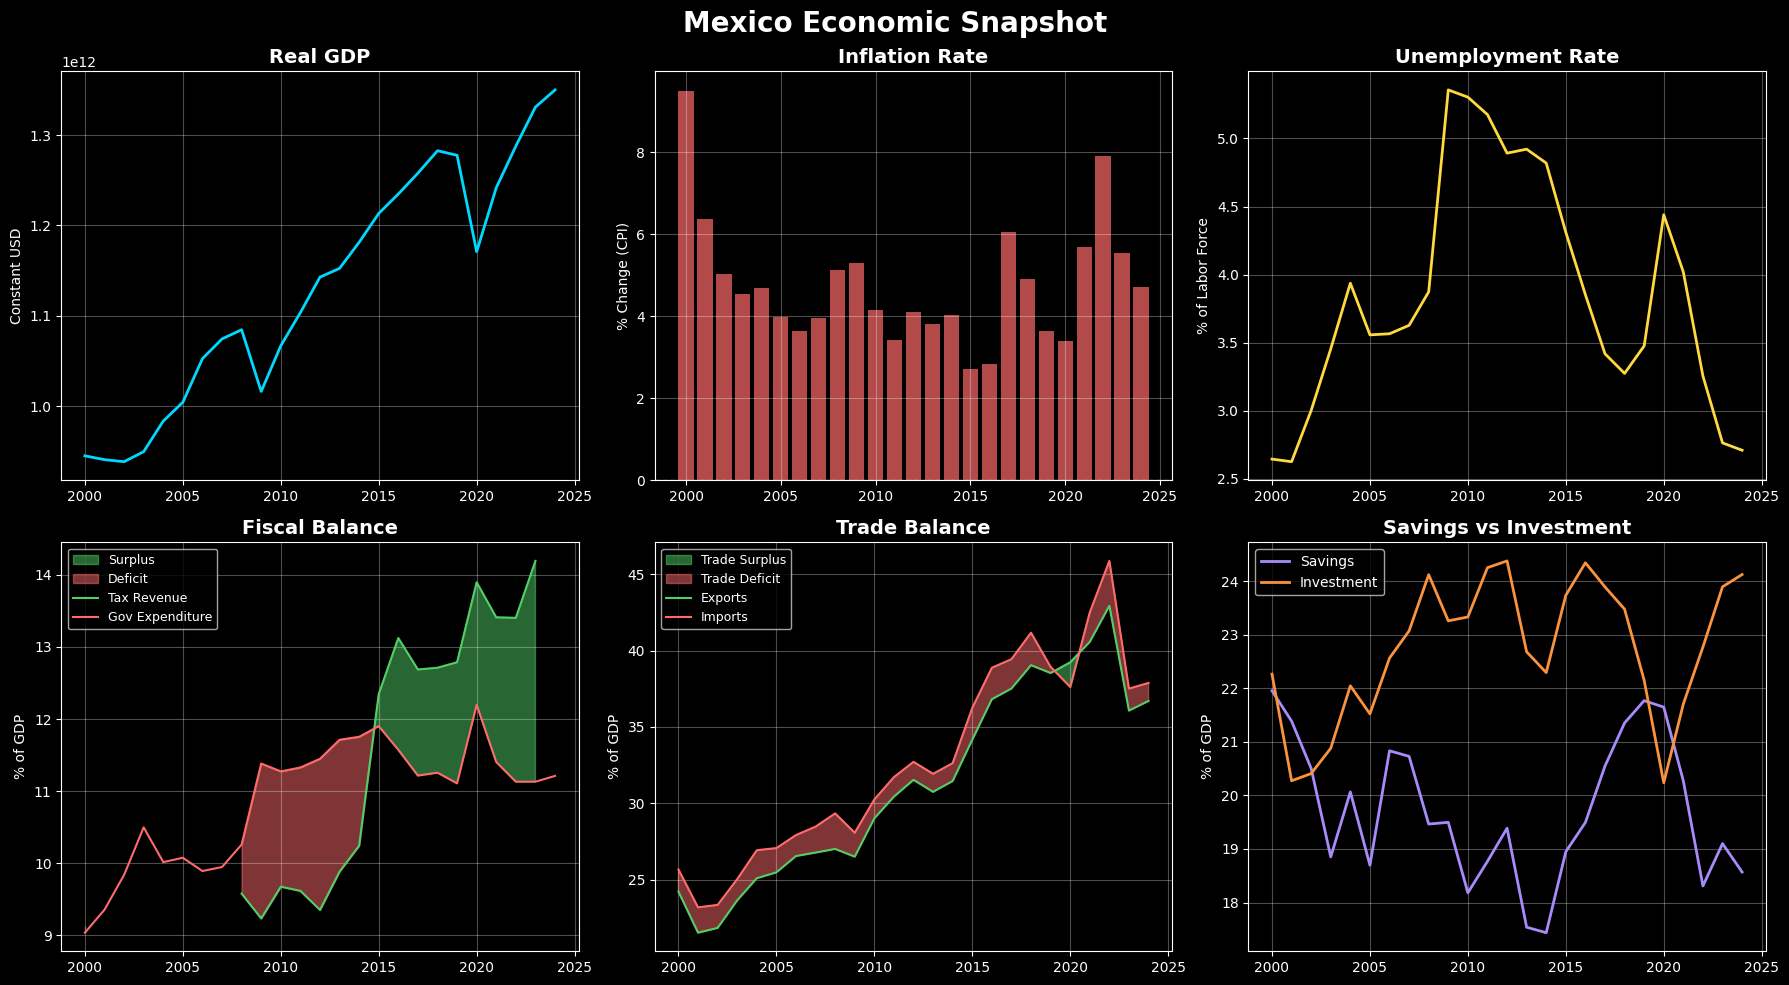

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set dark background style
plt.style.use('dark_background')

# Create 2x3 subplot grid
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Mexico Economic Snapshot', fontsize=20, fontweight='bold', y=0.98)

# 1. Top Left: Real GDP (Line)
axes[0, 0].plot(df_mex.index, df_mex['GDP_Const'], color='#00d9ff', linewidth=2)
axes[0, 0].set_title('Real GDP', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Constant USD')
axes[0, 0].grid(alpha=0.3)

# 2. Top Middle: Inflation Rate (Bar with 0 line)
axes[0, 1].bar(df_mex.index, df_mex['Inflation_CPI'], color='#ff6b6b', alpha=0.7)
axes[0, 1].axhline(0, color='white', linewidth=1, linestyle='--', alpha=0.5)
axes[0, 1].set_title('Inflation Rate', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('% Change (CPI)')
axes[0, 1].grid(alpha=0.3)

# 3. Top Right: Unemployment Rate (Line)
axes[0, 2].plot(df_mex.index, df_mex['Unemployment_Rate'], color='#ffd93d', linewidth=2)
axes[0, 2].set_title('Unemployment Rate', fontsize=14, fontweight='bold')
axes[0, 2].set_ylabel('% of Labor Force')
axes[0, 2].grid(alpha=0.3)

# 4. Bottom Left: Fiscal Balance (Fill between Tax Rev & Gov Exp)
axes[1, 0].fill_between(df_mex.index, df_mex['Tax_Rev_GDP'], df_mex['Gov_Exp_GDP'],
                         where=(df_mex['Tax_Rev_GDP'] >= df_mex['Gov_Exp_GDP']),
                         color='#51cf66', alpha=0.5, label='Surplus',
                         interpolate=True)
axes[1, 0].fill_between(df_mex.index, df_mex['Tax_Rev_GDP'], df_mex['Gov_Exp_GDP'],
                         where=(df_mex['Tax_Rev_GDP'] < df_mex['Gov_Exp_GDP']),
                         color='#ff6b6b', alpha=0.5, label='Deficit',
                         interpolate=True)
axes[1, 0].plot(df_mex.index, df_mex['Tax_Rev_GDP'], color='#51cf66', linewidth=1.5, label='Tax Revenue')
axes[1, 0].plot(df_mex.index, df_mex['Gov_Exp_GDP'], color='#ff6b6b', linewidth=1.5, label='Gov Expenditure')
axes[1, 0].set_title('Fiscal Balance', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('% of GDP')
axes[1, 0].legend(loc='best', fontsize=9)
axes[1, 0].grid(alpha=0.3)

# 5. Bottom Middle: Trade Balance (Fill between Exports & Imports)
axes[1, 1].fill_between(df_mex.index, df_mex['Exports_GDP'], df_mex['Imports_GDP'],
                         where=(df_mex['Exports_GDP'] >= df_mex['Imports_GDP']),
                         color='#51cf66', alpha=0.5, label='Trade Surplus',
                         interpolate=True)
axes[1, 1].fill_between(df_mex.index, df_mex['Exports_GDP'], df_mex['Imports_GDP'],
                         where=(df_mex['Exports_GDP'] < df_mex['Imports_GDP']),
                         color='#ff6b6b', alpha=0.5, label='Trade Deficit',
                         interpolate=True)
axes[1, 1].plot(df_mex.index, df_mex['Exports_GDP'], color='#51cf66', linewidth=1.5, label='Exports')
axes[1, 1].plot(df_mex.index, df_mex['Imports_GDP'], color='#ff6b6b', linewidth=1.5, label='Imports')
axes[1, 1].set_title('Trade Balance', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('% of GDP')
axes[1, 1].legend(loc='best', fontsize=9)
axes[1, 1].grid(alpha=0.3)

# 6. Bottom Right: Savings vs Investment (Dual lines)
axes[1, 2].plot(df_mex.index, df_mex['Gross_Dom_Savings'], color='#a78bfa', linewidth=2, label='Savings')
axes[1, 2].plot(df_mex.index, df_mex['Gross_Cap_Formation'], color='#fb923c', linewidth=2, label='Investment')
axes[1, 2].set_title('Savings vs Investment', fontsize=14, fontweight='bold')
axes[1, 2].set_ylabel('% of GDP')
axes[1, 2].legend(loc='best', fontsize=10)
axes[1, 2].grid(alpha=0.3)

# Apply tight layout and show
plt.tight_layout()
plt.show()